In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
import pandas as pd

data_path = '/content/drive/MyDrive/UNION_UBER_DATA.xlsx'
uber_data = pd.read_excel(data_path)


In [ ]:
data_path = '/content/drive/MyDrive/Weather Mapping.xlsx'
weather_data = pd.read_excel(data_path)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
weather_data.head()

Date  Temperature - High  Temperature - Avg  Temperature - Low  \
0 2014-04-01                  14                  8                  3   
1 2014-04-02                   9                  6                  3   
2 2014-04-03                  17                 11                  4   
3 2014-04-04                   7                  6                  5   
4 2014-04-05                  14                  9                  5   

   Dew Point - High  Dew Point - Avg  Dew Point - Low  Humidity - High  \
0                 2               -2               -4               76   
1                 5                3                1               92   
2                 5                1               -6               92   
3                 6                3                2               92   
4                 6                0               -6               93   

   Humidity - Avg  Humidity - Low  ...  Visibility - Avg  Visibility - Low  \
0              56              35  ...                16                16   
1              81              70  ...                16                16   
2              57              22  ...                16                13   
3              84              76  ...                13                 4   
4              63              32  ...                14                 3   

   Wind - Avg  Wind - Low  Wind - High  Precipitation  Event Rain  Event Fog  \
0          26          16           40           0.00         NaN        NaN   
1          16           6           32           0.76        Rain        NaN   
2          21           9           26           2.03        Rain        NaN   
3          42          22           52           2.54        Rain        NaN   
4          53          27           63           0.00        Rain        NaN   

   Event Thunderstorm  Event Snow  
0                 NaN         NaN  
1                 NaN         NaN  
2                 NaN         NaN  
3                 NaN         NaN  
4                 NaN         NaN  

[5 rows x 24 columns]

In [ ]:
uber_data.head()

Date      Time    Lat    Lon    Base      ID
0  4/1/2014  00:11:00  40.77 -73.95  B02512  APR_01
1  4/1/2014  00:17:00  40.73 -74.03  B02512  APR_02
2  4/1/2014  00:21:00  40.73 -73.99  B02512  APR_03
3  4/1/2014  00:28:00  40.76 -73.98  B02512  APR_04
4  4/1/2014  00:33:00  40.76 -73.97  B02512  APR_05

In [ ]:
# Convert 'Date' column to datetime format
uber_data['Date'] = pd.to_datetime(uber_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Merge Uber and weather data
merged_data = pd.merge(uber_data, weather_data, on='Date', how='left')

In [ ]:
merged_data.head()

Date      Time    Lat    Lon    Base      ID  Temperature - High  \
0 2014-04-01  00:11:00  40.77 -73.95  B02512  APR_01                  14   
1 2014-04-01  00:17:00  40.73 -74.03  B02512  APR_02                  14   
2 2014-04-01  00:21:00  40.73 -73.99  B02512  APR_03                  14   
3 2014-04-01  00:28:00  40.76 -73.98  B02512  APR_04                  14   
4 2014-04-01  00:33:00  40.76 -73.97  B02512  APR_05                  14   

   Temperature - Avg  Temperature - Low  Dew Point - High  ...  \
0                  8                  3                 2  ...   
1                  8                  3                 2  ...   
2                  8                  3                 2  ...   
3                  8                  3                 2  ...   
4                  8                  3                 2  ...   

   Visibility - Avg  Visibility - Low  Wind - Avg  Wind - Low  Wind - High  \
0                16                16          26          16           40   
1                16                16          26          16           40   
2                16                16          26          16           40   
3                16                16          26          16           40   
4                16                16          26          16           40   

   Precipitation  Event Rain  Event Fog  Event Thunderstorm  Event Snow  
0            0.0         NaN        NaN                 NaN         NaN  
1            0.0         NaN        NaN                 NaN         NaN  
2            0.0         NaN        NaN                 NaN         NaN  
3            0.0         NaN        NaN                 NaN         NaN  
4            0.0         NaN        NaN                 NaN         NaN  

[5 rows x 29 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Set 'datetime' as the index
merged_data['datetime'] = pd.to_datetime(merged_data['Date'].astype(str) + ' ' + merged_data['Time'].astype(str))
# merged_data.set_index('datetime', inplace=True)


In [ ]:
# Feature engineering
merged_data['weekday']=merged_data['datetime'].dt.day_name()
merged_data['day']=merged_data['datetime'].dt.day
merged_data['minute']=merged_data['datetime'].dt.minute
merged_data['month']=merged_data['datetime'].dt.month
merged_data['hour']=merged_data['datetime'].dt.hour
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172754 entries, 0 to 172753
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                172754 non-null  datetime64[ns]
 1   Time                172754 non-null  object        
 2   Lat                 172754 non-null  float64       
 3   Lon                 172754 non-null  float64       
 4   Base                172754 non-null  object        
 5   ID                  172754 non-null  object        
 6   Temperature - High  172754 non-null  int64         
 7   Temperature - Avg   172754 non-null  int64         
 8   Temperature - Low   172754 non-null  int64         
 9   Dew Point - High    172754 non-null  int64         
 10  Dew Point - Avg     172754 non-null  int64         
 11  Dew Point - Low     172754 non-null  int64         
 12  Humidity - High     172754 non-null  int64         
 13  Humidity - Avg      172754 no

In [ ]:
# Excel file for tableau
merged_data.to_excel('uber_df.xlsx', index=False)

In [ ]:
# Feature engineering
#merged_data['hour'] = merged_data['Date'].dt.hour
#merged_data['is_weekend'] = (merged_data['Date'].dt.weekday >= 5).astype(int)

# Perform one-hot encoding for the 'event_fog' column
df = pd.get_dummies(merged_data, columns=['Event Rain','Event Fog',
       'Event Thunderstorm', 'Event Snow'])

# Check for missing values
print(merged_data.isnull().sum())

Date                       0
Time                       0
Lat                        0
Lon                        0
Base                       0
ID                         0
Temperature - High         0
Temperature - Avg          0
Temperature - Low          0
Dew Point - High           0
Dew Point - Avg            0
Dew Point - Low            0
Humidity - High            0
Humidity - Avg             0
Humidity - Low             0
Sea Level - High           0
Sea Level - Avg            0
Sea Level - Low            0
Visibility - High          0
Visibility - Avg           0
Visibility - Low           0
Wind - Avg                 0
Wind - Low                 0
Wind - High                0
Precipitation              0
Event Rain            101814
Event Fog             161503
Event Thunderstorm    154256
Event Snow            169988
datetime                   0
weekday                    0
day                        0
minute                     0
month                      0
hour          

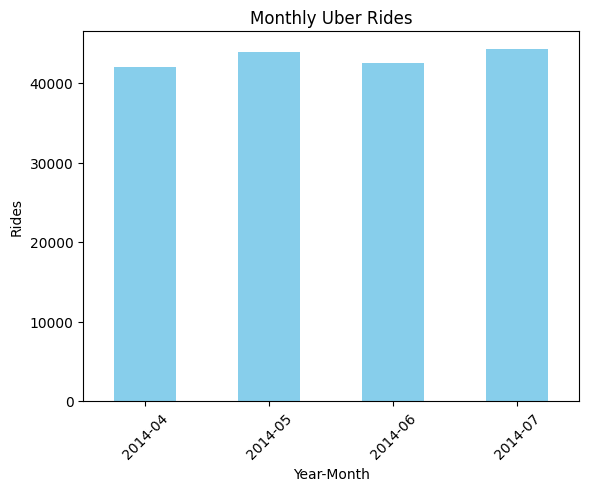

In [ ]:
# Monthly rides visualization with only year and month on x-axis label
monthly_data = merged_data.resample('M', on='Date').size()
monthly_data.index = monthly_data.index.strftime('%Y-%m')  # Format the index to show only year and month
monthly_data.plot(kind='bar', color='skyblue')
plt.title('Monthly Uber Rides')
plt.xlabel('Year-Month')
plt.ylabel('Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

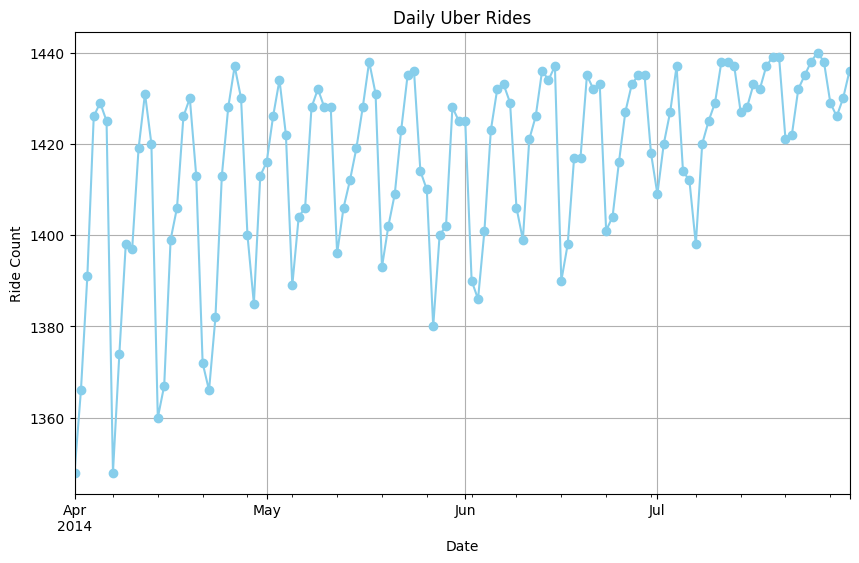

In [ ]:
# Resample the data to daily frequency and sum the ride counts for each day
daily_ride_count = merged_data.resample('D').size()

# Plot the daily ride count
daily_ride_count.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), color='skyblue')

plt.title('Daily Uber Rides')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.grid(True)
plt.show()

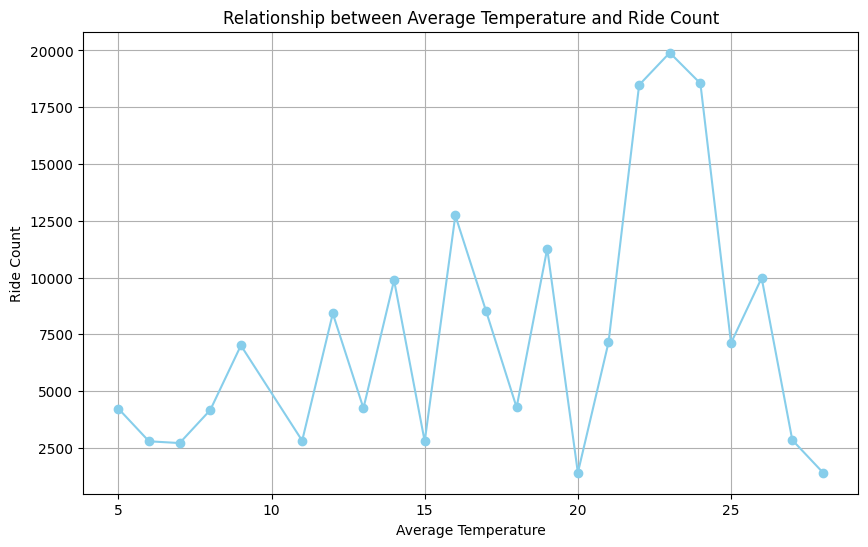

In [ ]:
# Group by average temperature and count the number of rides (using 'ID' as a unique identifier)
avg_temp_ride_count = merged_data.groupby('Temperature - Avg')['ID'].count()

# Line plot of average temperature and ride count
plt.figure(figsize=(10, 6))
avg_temp_ride_count.plot(kind='line', marker='o', linestyle='-', color='skyblue')

plt.title('Relationship between Average Temperature and Ride Count')
plt.xlabel('Average Temperature')
plt.ylabel('Ride Count')
plt.grid(True)
plt.show()

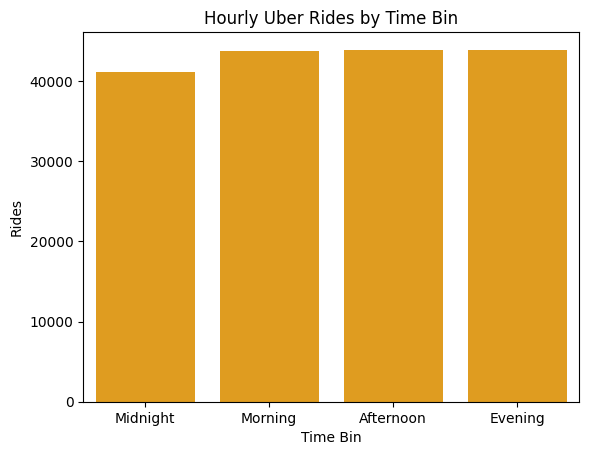

In [ ]:
# Define custom time bins
midnight = ((merged_data.index.hour >= 0) & (merged_data.index.hour < 6))
morning = ((merged_data.index.hour >= 6) & (merged_data.index.hour < 12))
afternoon = ((merged_data.index.hour >= 12) & (merged_data.index.hour < 18))
evening = ((merged_data.index.hour >= 18) & (merged_data.index.hour < 24))

# Categorize each row into one of the custom time bins
merged_data['time_bin'] = 'Midnight'
merged_data.loc[morning, 'time_bin'] = 'Morning'
merged_data.loc[afternoon, 'time_bin'] = 'Afternoon'
merged_data.loc[evening, 'time_bin'] = 'Evening'

# Hourly rides visualization with custom time bins
hourly_data = merged_data.groupby('time_bin')['ID'].size()

# Define the order of x-axis labels
time_bin_order = ['Midnight', 'Morning', 'Afternoon', 'Evening']

# Plot with seaborn for better control over x-axis order
sns.barplot(x=hourly_data.index, y=hourly_data.values, order=time_bin_order, color='orange')

plt.title('Hourly Uber Rides by Time Bin')
plt.xlabel('Time Bin')
plt.ylabel('Rides')
plt.show()

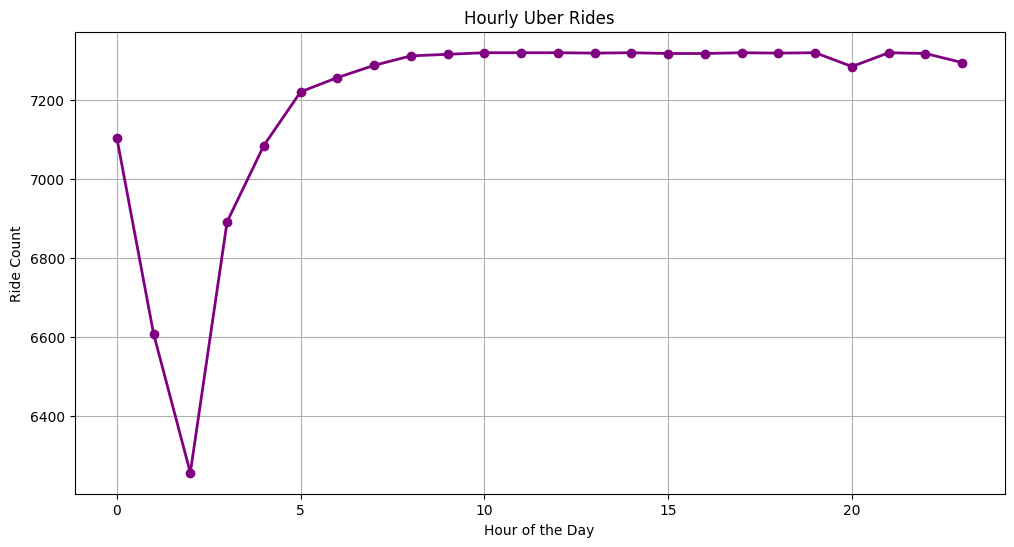

In [ ]:
# Calculate hourly ride counts
hourly_ride_counts = merged_data.groupby(merged_data.index.hour)['ID'].count()

# Plot line graph
plt.figure(figsize=(12, 6))
hourly_ride_counts.plot(kind='line', marker='o', color='purple', linestyle='-', linewidth=2)

# Set plot labels and title
plt.title('Hourly Uber Rides')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Count')
plt.grid(True)
plt.show()

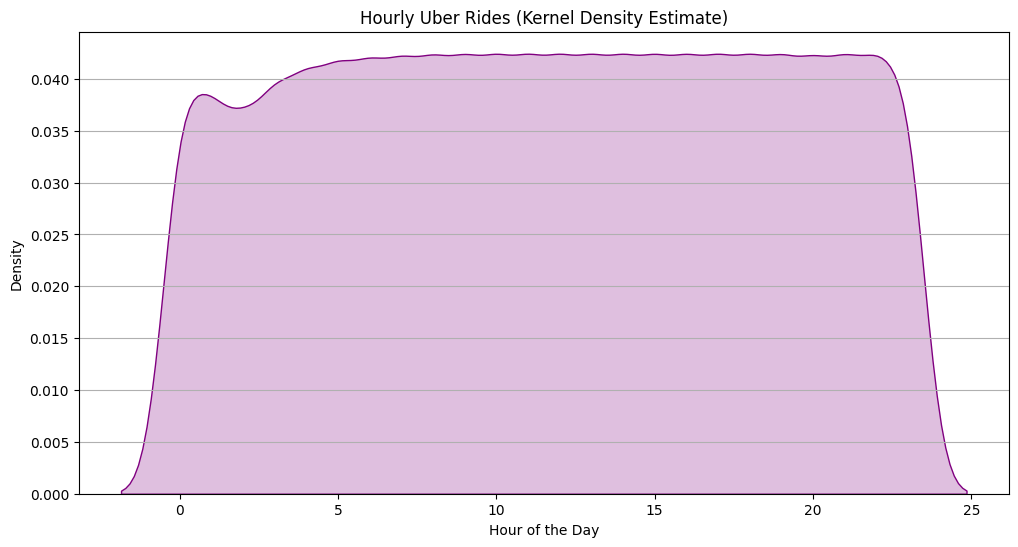

In [ ]:
# KDE plot of ride count by hour
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_data, x=merged_data.index.hour, fill=True, color='purple')

plt.title('Hourly Uber Rides (Kernel Density Estimate)')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.grid(axis='y')
plt.show()

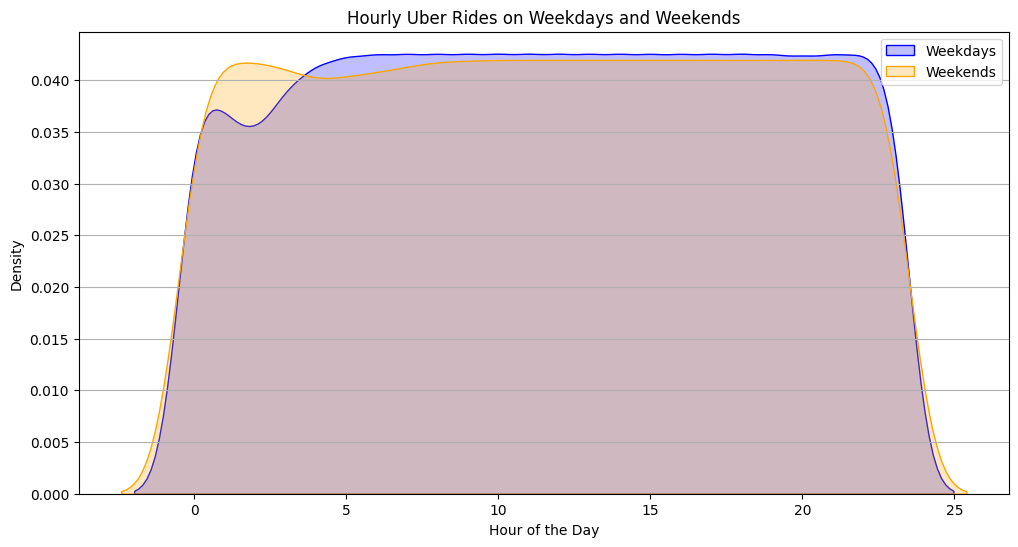

In [ ]:
# Create a new column for weekdays (0: Monday, 1: Tuesday, ..., 6: Sunday)
merged_data['weekday'] = merged_data.index.weekday

# Create separate DataFrames for weekdays and weekends
weekday_data = merged_data[merged_data['weekday'] < 5]  # Weekdays (Monday to Friday)
weekend_data = merged_data[merged_data['weekday'] >= 5]  # Weekends (Saturday and Sunday)

# KDE plot for ride count by hour on weekdays
plt.figure(figsize=(12, 6))
sns.kdeplot(data=weekday_data, x=weekday_data.index.hour, fill=True, color='blue', label='Weekdays')

# KDE plot for ride count by hour on weekends
sns.kdeplot(data=weekend_data, x=weekend_data.index.hour, fill=True, color='orange', label='Weekends')

plt.title('Hourly Uber Rides on Weekdays and Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y')
plt.show()

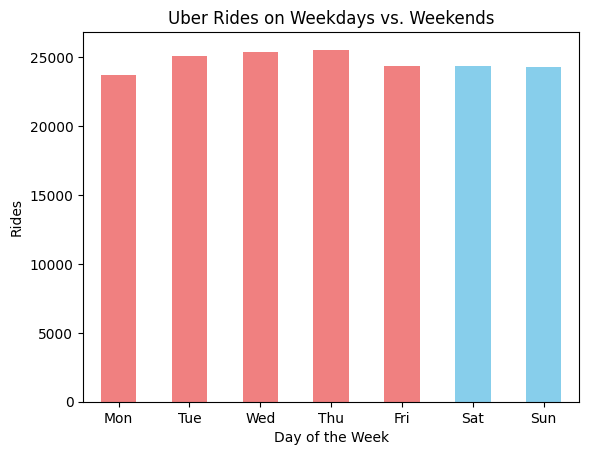

In [ ]:
# Weekday vs. Weekend rides visualization
merged_data['weekday'] = merged_data['Date'].dt.weekday
weekday_vs_weekend = merged_data.groupby('weekday')['ID'].count()
weekday_vs_weekend.plot(kind='bar', color=['lightcoral', 'lightcoral', 'lightcoral', 'lightcoral', 'lightcoral','skyblue', 'skyblue'])
plt.title('Uber Rides on Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Rides')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


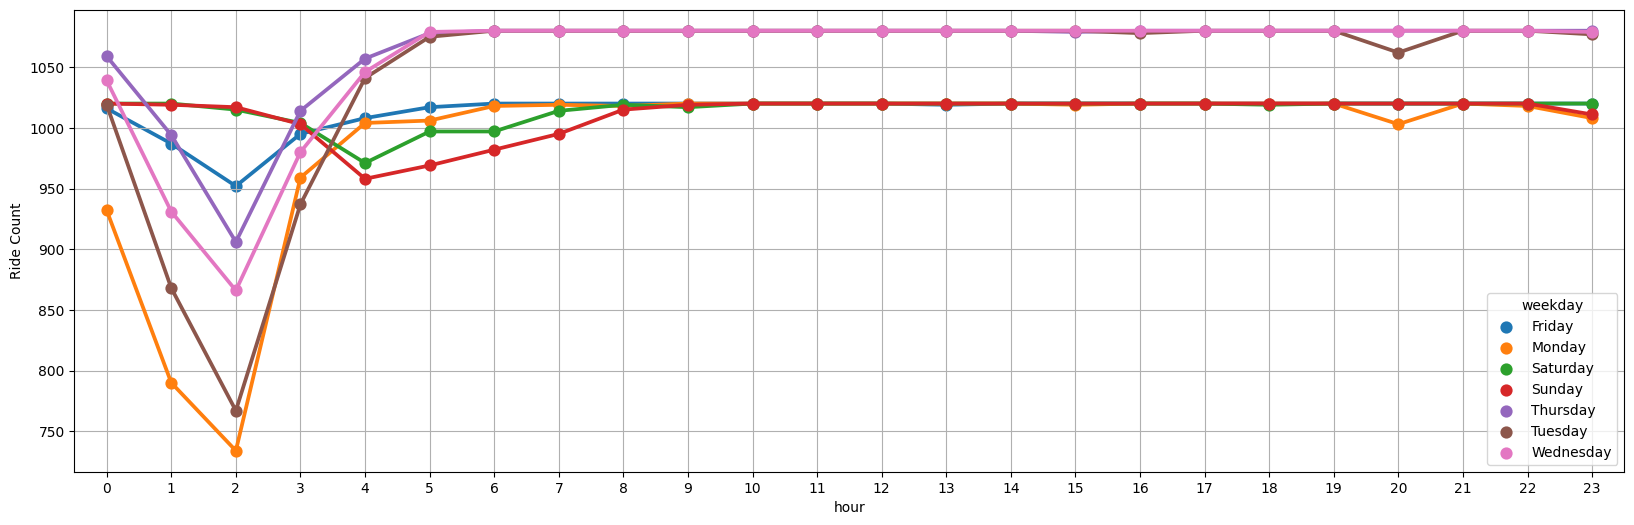

In [ ]:
# Number of ride by day of the week per hour
DF=merged_data.groupby(['weekday', 'hour'])['Date'].count().reset_index()

plt.figure(figsize=(20,6))
sns.pointplot(x="hour", y="Date", hue="weekday", data=DF)
plt.ylabel('Ride Count')
plt.grid()

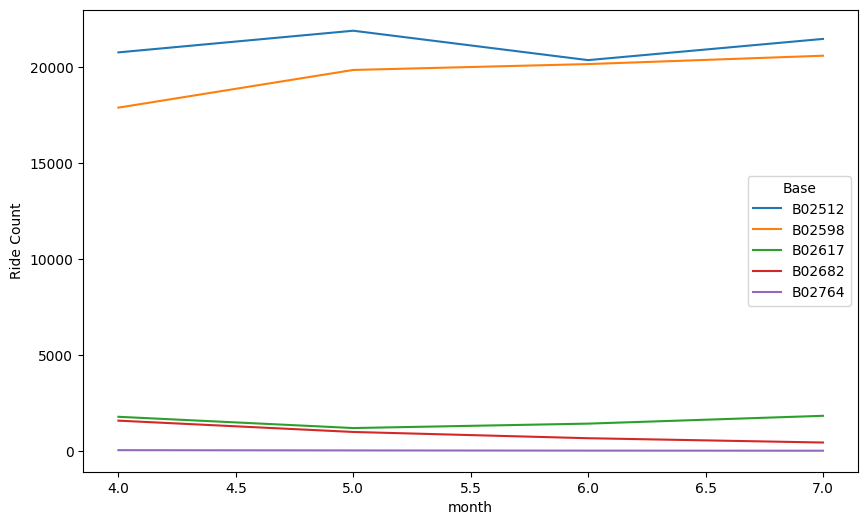

In [ ]:
# Number of rides per base per month
base=df.groupby(['Base','month'])['Date'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Date', hue='Base', data=base)
plt.ylabel('Ride Count')
plt.show()

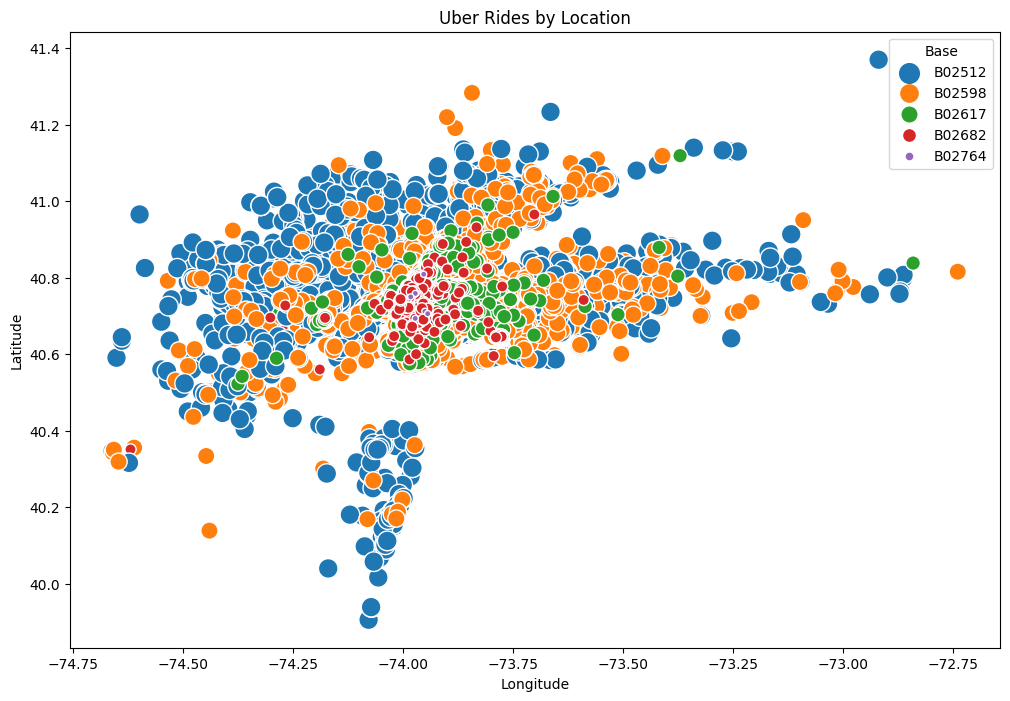

In [ ]:
# Location-based rides visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Lon', y='Lat', hue='Base', size='Base', sizes=(20, 200), data=merged_data)
plt.title('Uber Rides by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around New York
base_map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Add a heatmap layer using Lat and Lon columns for location and ride count for intensity
heat_data = [[row['Lat'], row['Lon']] for index, row in merged_data.iterrows()]
HeatMap(heat_data).add_to(base_map)


base_map

In [ ]:
import pandas as pd
import plotly.express as px


# Extract day of the week from the datetime index
merged_data['DayOfWeek'] = merged_data.index.day_name()

# Group by day of the week, latitude, and longitude, and count the number of rides
grouped_data = merged_data.groupby(['DayOfWeek', 'Lat', 'Lon']).size().reset_index(name='RideCount')

# Create the plot
fig = px.scatter_mapbox(
    grouped_data,
    lat="Lat",
    lon="Lon",
    color="RideCount",
    size="RideCount",
    hover_name="DayOfWeek",
    animation_frame="DayOfWeek",  # If you want an animation over days
    zoom=10,
    mapbox_style="carto-positron",
    title="Ride Counts by Day of the Week and Location"
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


<ipython-input-104-292b04b1c8e1>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



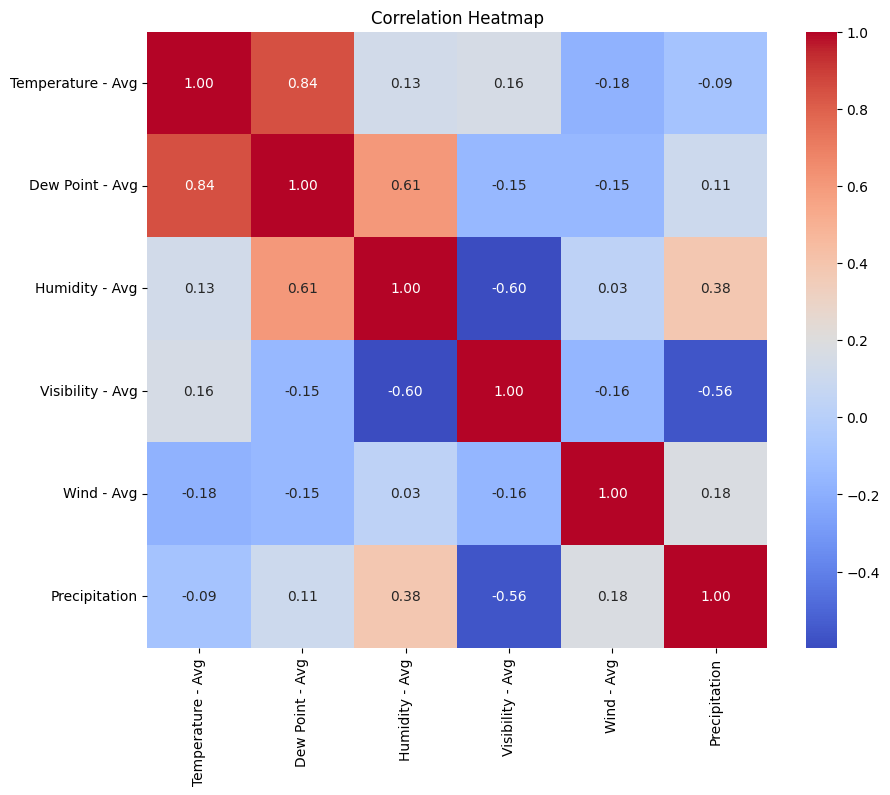

In [ ]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_columns = ['ID', 'Temperature - Avg', 'Dew Point - Avg','Humidity - Avg','Visibility - Avg','Wind - Avg','Precipitation']

# Create a correlation matrix
correlation_matrix = merged_data[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


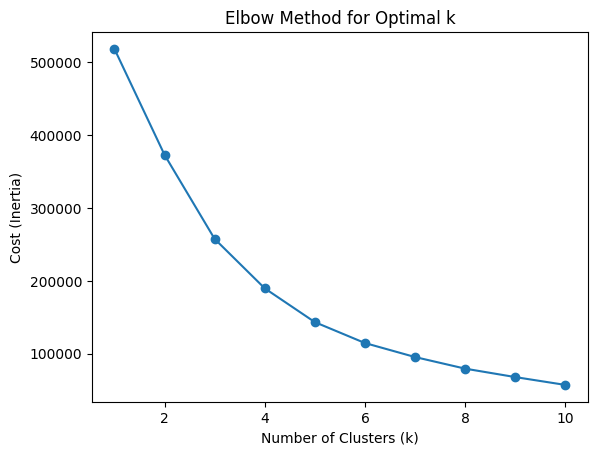

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_data' is your DataFrame
features = ['Temperature - Avg', 'Wind - Avg', 'Precipitation']
X = merged_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the elbow method to find the optimal number of clusters
cost = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Add n_init parameter
    kmeans.fit(X_scaled)
    cost.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), cost, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Choose the optimal number of clusters based on the elbow method
optimal_k = 3  # Replace with the identified optimal number of clusters

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



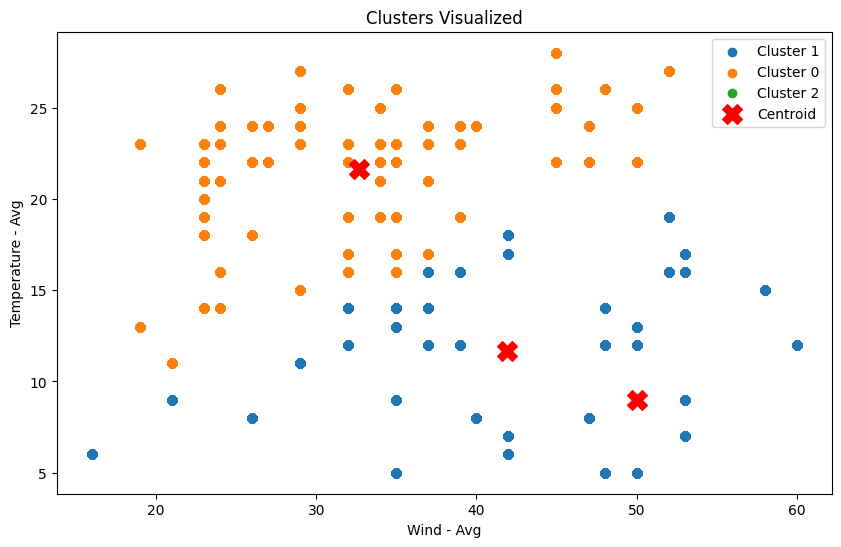

In [ ]:
# Calculate cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))

for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Wind - Avg'], cluster_data['Temperature - Avg'], label=f'Cluster {cluster}')

# Mark cluster centroids with a different marker and color
plt.scatter(centroids[:, features.index('Wind - Avg')], centroids[:, features.index('Temperature - Avg')], marker='X', s=200, c='red', label='Centroid')

plt.title('Clusters Visualized')
plt.xlabel('Wind - Avg')
plt.ylabel('Temperature - Avg')
plt.legend()
plt.show()

In [ ]:
# Group by the 'Cluster' column
grouped_data = merged_data.groupby('Cluster')

# Display descriptive statistics for each cluster
for cluster, cluster_data in grouped_data:
    print(f"\nCluster {cluster}:\n")
    print(cluster_data[features].describe())


Cluster 0:

       Temperature - Avg     Wind - Avg  Precipitation
count      119420.000000  119420.000000  119420.000000
mean           21.650502      32.640814       2.746702
std             3.550061       7.796280       7.305505
min            11.000000      19.000000       0.000000
25%            19.000000      26.000000       0.000000
50%            23.000000      32.000000       0.000000
75%            24.000000      37.000000       1.020000
max            28.000000      52.000000      47.500000

Cluster 1:

       Temperature - Avg    Wind - Avg  Precipitation
count       51921.000000  51921.000000   51921.000000
mean           11.642033     41.900040       2.949837
std             3.957149     10.065495       7.083938
min             5.000000     16.000000       0.000000
25%             8.000000     35.000000       0.000000
50%            12.000000     42.000000       0.000000
75%            14.000000     50.000000       0.760000
max            19.000000     60.000000      32.